In [1]:
import random
import projetannuel

In [2]:
from lib_gridfs import load_posters_with_size, stock_metrics

In [3]:
imgs, genres = load_posters_with_size((15, 10), genres=['Horreur', 'Animation'])

📦 Found 1971 resized images of size 15x10


📥 Loading resized images: 100%|██████████| 1971/1971 [00:01<00:00, 1233.07it/s]


🛠 Found 0 fullsize images to resize to 15x10


🛠 Resizing and saving missing images: 0it [00:00, ?it/s]


In [4]:
imgs_as_lists = [img.tolist() for img in imgs]

In [5]:
data = list(zip(imgs_as_lists, genres))
# filtered_data = [(img, genre) for img, genre in data if genre in ['Animation', 'Horreur']]

In [6]:
random.shuffle(data)
imgs_shuffled = [movie[0] for movie in data]
genres_shuffled = [movie[1] for movie in data]

In [7]:
# genres_shuffled_binarygenres_shuffled_binary = []
# for g in genres_shuffled:
#     .append(0 if g == "Horreur" else 1)

In [8]:
lim = int(len(data) * 0.8)
imgs_as_lists_train = imgs_shuffled[:lim]
genres_train = genres_shuffled[:lim]
imgs_as_lists_test = imgs_shuffled[lim:]
genres_test = genres_shuffled[lim:]

In [9]:
print(imgs_shuffled[0])

[174, 170, 145, 186, 182, 157, 196, 190, 166, 208, 200, 177, 221, 210, 188, 226, 211, 190, 219, 203, 180, 210, 190, 166, 186, 164, 140, 173, 149, 121, 168, 141, 111, 157, 131, 96, 173, 143, 105, 171, 142, 100, 195, 166, 124, 188, 184, 159, 180, 176, 151, 206, 200, 176, 208, 200, 177, 183, 172, 152, 178, 163, 142, 182, 165, 145, 186, 165, 144, 226, 204, 180, 192, 168, 142, 173, 148, 118, 164, 138, 105, 189, 161, 124, 218, 190, 151, 235, 207, 167, 143, 138, 116, 173, 168, 146, 205, 199, 177, 159, 151, 130, 102, 91, 73, 83, 68, 49, 78, 61, 43, 113, 92, 73, 125, 103, 82, 119, 95, 71, 144, 120, 94, 156, 131, 101, 168, 143, 112, 211, 187, 151, 214, 190, 152, 150, 145, 125, 143, 138, 118, 129, 122, 103, 104, 95, 78, 121, 109, 93, 107, 91, 76, 65, 48, 32, 109, 90, 75, 90, 69, 52, 76, 55, 36, 99, 77, 54, 101, 79, 55, 100, 79, 52, 160, 141, 111, 162, 143, 111, 174, 169, 150, 122, 117, 98, 126, 119, 101, 158, 149, 134, 162, 150, 136, 109, 93, 80, 62, 44, 34, 94, 76, 64, 137, 117, 106, 94, 75, 61,

# RBF

In [10]:
# param_grid = {
#     'C': [10, 100, 1000],
#     'gamma': [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
#     "learning_rate": [0.001, 0.01, 0.05, 0.1],
#     "epochs": [10000, 50000, 100000],
# }

In [11]:
# import itertools

# best_score = 0.0
# best_params = None
# y = projetannuel.string_labels(genres_shuffled)

# for c, gamma in itertools.product(
#     param_grid["C"],
#     param_grid["gamma"],
# ):
#     model = projetannuel.RBF(
#         imgs_shuffled,
#         y,
#         gamma = gamma,
#         k = c,
#         seed = 42
#     )
#     model.train_classification(epochs=1_000, learning_rate=0.01, algo="gradient-descent", x_test=imgs_shuffled, y_test=projetannuel.string_labels(genres_shuffled))
#     Y_pred = [model.predict(x) for x in imgs_shuffled]
#     acc = projetannuel.accuracy_score(genres_shuffled, Y_pred)
    
#     prop = Y_pred.count("Horreur") / len(Y_pred)
    
#     print(f"Proportion de 'Horreur' : {prop}")
#     print(f"Tested: Gamma={gamma}, C={c}, acc={acc:.4f}")
    
#     if acc > best_score:
#         best_score = acc
#         best_params = (gamma, c)

In [12]:
y = projetannuel.string_labels(genres_train)

model = projetannuel.RBF(
    imgs_as_lists_train,
    y,
    gamma = 0.1,
    k = 500,
    seed = 42
)

model.train_classification(epochs=5000, learning_rate=0.05, x_test=imgs_as_lists_test, y_test=projetannuel.string_labels(genres_test), algo="rosenblatt")

In [13]:
Y_pred = [model.predict(x) for x in imgs_as_lists_test]
print(f"Accuracy Score : {projetannuel.accuracy_score(genres_test, Y_pred)}")

Accuracy Score : 0.4759493670886076


In [14]:
model.save("truc.json")

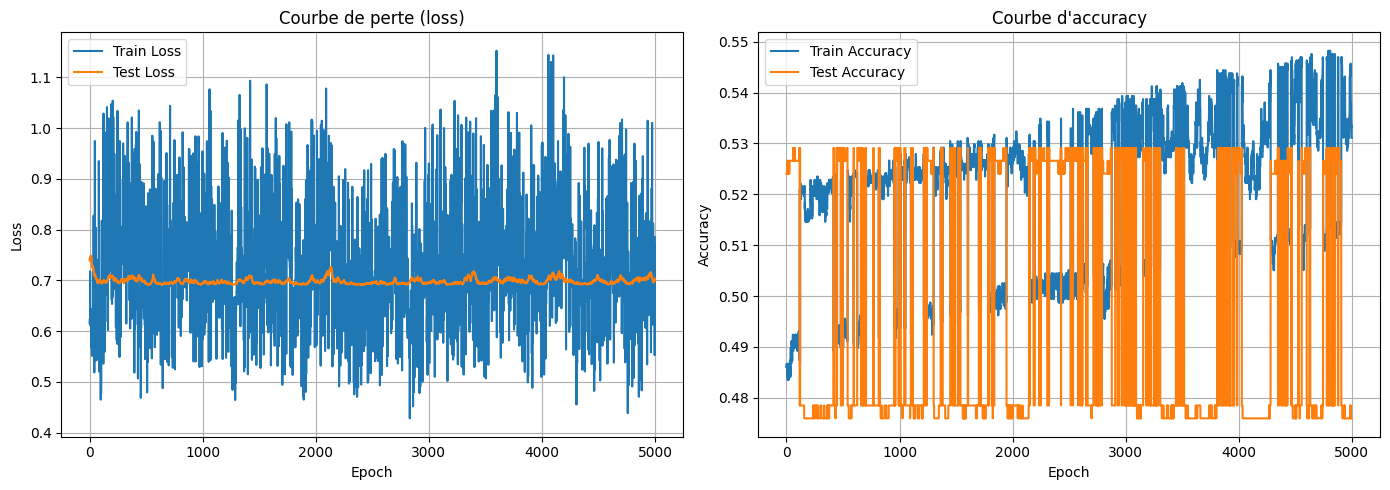

In [15]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Courbe de perte (Loss)
axs[0].plot(model.train_loss, label='Train Loss')
axs[0].plot(model.test_loss, label='Test Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].set_title('Courbe de perte (loss)')
axs[0].grid(True)
axs[0].legend()

# Courbe d'accuracy
axs[1].plot(model.train_accuracy, label='Train Accuracy')
axs[1].plot(model.test_accuracy, label='Test Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Courbe d\'accuracy')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()